# Lead Scoring Case Study

### By: Soumik Adak

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Step 1: Importing Libraries and Data

 ### 1.1 Import Libraries

In [179]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [180]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


# Import statmodel libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 1.2  Read the Data

In [181]:
lead_data = pd.read_csv(r"E:\upGrad\Lead Scoring Case Study\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [182]:
# Lets store the data into a backup variable
backup_data = lead_data

In [183]:
lead_data.shape

(9240, 37)

- The original dataframe has 9240 rows and 37 columns

## Step 2: Data Understanding and Inspection

In [184]:
# Check data types of columns
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [185]:
# Check summary of all numerical columns to understand the dataset better in terms of spread
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [186]:
# Checking number of unique values in each column
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [187]:
#Checking for count of null values in each column
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

- There are few columns with quite a high number of missing/null values in the dataframe. We will have to decide how to address them in data cleaning / data imputation step

In [188]:
lead_data.duplicated().sum()

0

 - There are no duplicates in the dataframe

## Step 3: Data Cleaning

### 3.1 Treatment for 'Select' values

As mentioned in the Problem Statement, many of the categorical variables have a level called **`'Select'`** **which needs to be handled because it is as good as a null value.** One of the reason might be is that the customer did not select any option from the list and hence for such columns the data remained as default 'Select' for Select. 

In [189]:
# Converting 'Select' values to NaN
lead_data = lead_data.replace("Select", np.nan)

### 3.2 Handling Missing Values

In [190]:
# Calculating Missing Values Percentage
round(lead_data.isnull().sum()/len(lead_data.index), 2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

#### 3.2.1 Drop Columns with more than 40% Null Values

In [191]:
# Dropping the columns with missing values greater than or equal to 40%
lead_data = lead_data.drop(columns = ["How did you hear about X Education", "Lead Quality", "Lead Profile", 
                                      "Asymmetrique Activity Index", "Asymmetrique Profile Index", 
                                      "Asymmetrique Activity Score", "Asymmetrique Profile Score"])

In [192]:
lead_data.shape

(9240, 30)

In [193]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index), 2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

### 3.2.2 Columns with Categorical Data

In [194]:
# Select the columns with non-numeric data type
categorical_columns = lead_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the selected columns
print(categorical_columns)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


- First check the count of values in each categorical column and then decide how to treat the missing values for that particular column

In [195]:
columnsList = ['City','Specialization','Tags','What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']


for i in columnsList:
    column_value = 100*lead_data[i].value_counts(normalize=True)
    print("Value counts percentage for : ", i, '\n')
    print(column_value, "\n")
    print("______"*10, "\n")

Value counts percentage for :  City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

____________________________________________________________ 

Value counts percentage for :  Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality 

#### Insights:
- <strong>City:</strong> City has 40.00 % missing values. Imputing missing values with Mumbai will make the data more skewed. Skewness will later cause bias in the model. Hence `City column can be dropped`. 

- <strong>Specialization:</strong> Specialization has 37.00 % missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. We need to create additional category called `'Others'`. 

- <strong>Tags:</strong> Tags has 36.00 % missing values. Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will `not be useful for modeling`. Hence it can be `dropped`.

- <strong>What matters most to you in choosing a course:</strong> This variable has 29.00 % missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will `not provide any insight`.

- <strong>What is your current occupation:</strong> We can impute the missing values with `'Unemployed'` as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed. 

- <strong>Country:</strong> X Education sells online courses and appx 96% of the customers are from India. Does not make business sense right now to impute missing values with India. Hence `Country column can be dropped.

- <strong>Last Activity:</strong> `"Email Opened"` is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label `'Email Opened'`.

- <strong>Lead Source:</strong> `"Google"` is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will impute the missing values with label 'Google'


<strong>Dropping the following columns</strong> 
- 'City',
- 'Tags',
- 'Country',
- 'What matters most to you in choosing a course'

In [196]:
# Dropping the above columns
print("Before dropping shape is:", lead_data.shape)
lead_data.drop(['City','Tags','Country','What matters most to you in choosing a course'], axis=1, inplace=True)
print("After dropping shape is:", lead_data.shape)

Before dropping shape is: (9240, 30)
After dropping shape is: (9240, 26)


<strong>Imputing the following columns</strong> 
- 'Specialization',
- 'Lead Source',
- 'Last Activity', 
- 'What is your current occupation'

In [197]:
# Imputing values as per the above observations
missing_values = {'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
lead_data = lead_data.fillna(value=missing_values)

In [198]:
# Re Checking the percentage of null values for remaining columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

### 3.2.3 Columns with Numerical Data

In [199]:
# TotalVisits column
print("TotalVisits value counts")
print("----------------------------")
lead_data['TotalVisits'].value_counts().head(10)

TotalVisits value counts
----------------------------


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

<strong>NOTE:</strong> Missing values in 'TotalVisits' can be imputed with `mode`.

In [200]:
# TotalVisits missing values to be imputed with mode
lead_data['TotalVisits'].fillna(lead_data['TotalVisits'].mode()[0], inplace=True)

In [201]:
# Lets check for Page Views Per Visit
print("Page Views Per Visit value counts")
print("-------------------------------------")
lead_data['Page Views Per Visit'].value_counts().head(10)

Page Views Per Visit value counts
-------------------------------------


0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: Page Views Per Visit, dtype: int64

<strong>NOTE:</strong> Missing values in 'Page Views Per Visit' can be imputed with `mode`.

In [202]:
# Page Views Per Visit missing values to be imputed with mode
lead_data['Page Views Per Visit'].fillna(lead_data['Page Views Per Visit'].mode()[0], inplace=True)

In [203]:
# Re Checking the percentage of null values after handling categorical and numerical columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

- Now we don't have any missing value in the dataset.

### 3.3 Removing Unwanted Columns

In [204]:
# Check for "Last Notable Activity"
print("Value counts for Last Notable Activity")
print("-----------------------------------------")
lead_data['Last Notable Activity'].value_counts(normalize=True)

Value counts for Last Notable Activity
-----------------------------------------


Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: Last Notable Activity, dtype: float64

#### 3.3.1 Handling columns with only one unique value 

In [205]:
#check for columns with one unique value
lead_data.nunique()

Prospect ID                                 9240
Lead Number                                 9240
Lead Origin                                    5
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                 17
Specialization                                19
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates

<strong>NOTE:</strong> Following columns have only **`one unique value`**: 
- 'I agree to pay the amount through cheque', 
- 'Get updates on DM Content', 
- 'Update me on Supply Chain Content', 
- 'Receive More Updates About Our Courses', 
- 'Magazine'

These columns are of no use as they have <u>_only one category of response_</u> from customer and can be <strong>dropped:</strong>

In [206]:
# List of columns with one unique value we will drop these columns
lead_data.drop(['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque'], axis=1, inplace=True)

In [207]:
lead_data.shape

(9240, 21)

#### 3.3.2 Dropping columns of no use for modeling

<strong>NOTE:</strong> Columns such as:
 
- 'Prospect ID',
- 'Lead Number',
- 'Last Notable Activity' 
 
Above columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe.

In [208]:
# Dropping Columns
lead_data.drop(['Prospect ID','Lead Number','Last Notable Activity'], axis=1, inplace=True)

In [209]:
lead_data.shape

(9240, 18)

### 3.4 Checking & Dropping Category Columns that are Skewed

#### 3.4.1 Checking skewness in categorical columns

In [210]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

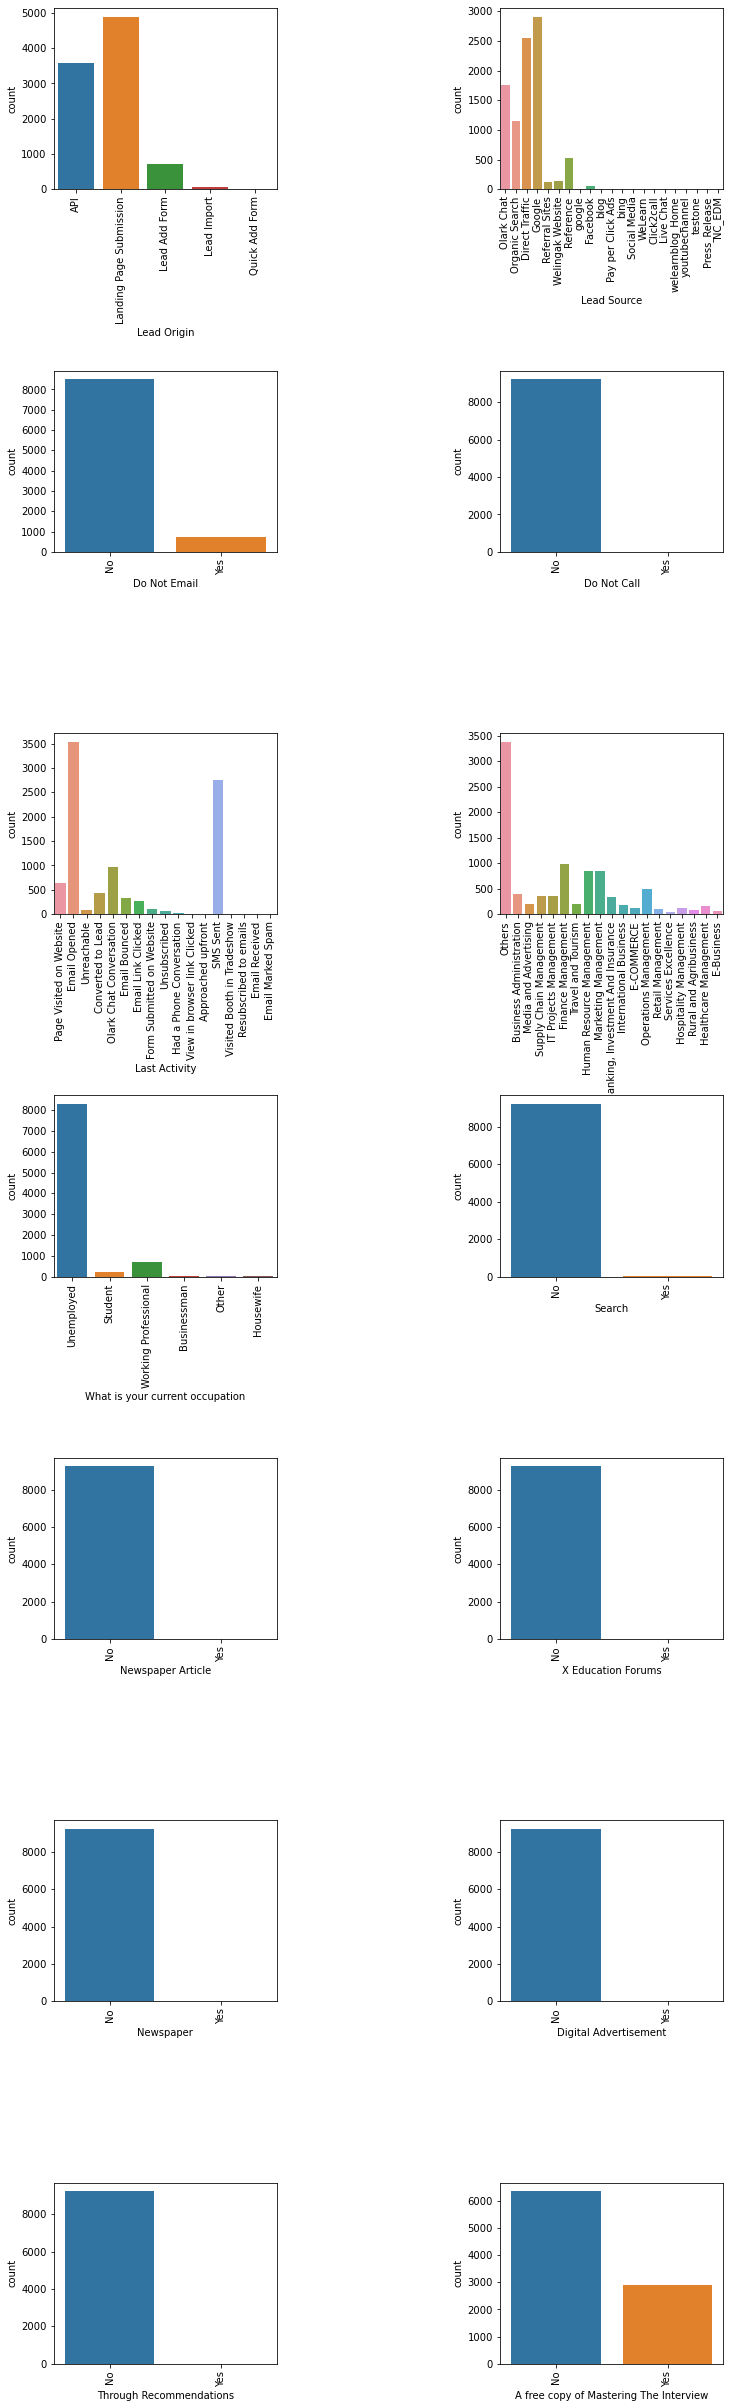

In [211]:
plt.figure(figsize=(12,50))
plt.subplots_adjust(wspace=1, hspace=1)

plt.subplot(8,2,1)
sns.countplot(data=lead_data, x='Lead Origin')
plt.xticks(rotation=90)

plt.subplot(8,2,2)
sns.countplot(data=lead_data, x='Lead Source')
plt.xticks(rotation=90)

plt.subplot(8,2,3)
sns.countplot(data=lead_data, x='Do Not Email')
plt.xticks(rotation=90)

plt.subplot(8,2,4)
sns.countplot(data=lead_data, x='Do Not Call')
plt.xticks(rotation=90)

plt.subplot(8,2,5)
sns.countplot(data=lead_data, x='Last Activity')
plt.xticks(rotation=90)

plt.subplot(8,2,6)
sns.countplot(data=lead_data, x='Specialization')
plt.xticks(rotation=90)

plt.subplot(8,2,7)
sns.countplot(data=lead_data, x='What is your current occupation')
plt.xticks(rotation=90)

plt.subplot(8,2,8)
sns.countplot(data=lead_data, x='Search')
plt.xticks(rotation=90)

plt.subplot(8,2,9)
sns.countplot(data=lead_data, x='Newspaper Article')
plt.xticks(rotation=90)

plt.subplot(8,2,10)
sns.countplot(data=lead_data, x='X Education Forums')
plt.xticks(rotation=90)

plt.subplot(8,2,11)
sns.countplot(data=lead_data, x='Newspaper')
plt.xticks(rotation=90)

plt.subplot(8,2,12)
sns.countplot(data=lead_data, x='Digital Advertisement')
plt.xticks(rotation=90)

plt.subplot(8,2,13)
sns.countplot(data=lead_data, x='Through Recommendations')
plt.xticks(rotation=90)

plt.subplot(8,2,14)
sns.countplot(data=lead_data, x='A free copy of Mastering The Interview')
plt.xticks(rotation=90)

plt.show()

<strong>NOTE:</strong> Following columns have data which is `highly skewed` :
- 'Do Not Call',
- 'Search', 
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper', 
- 'Digital Advertisement',
- 'Through Recommendations'. 

Hence these columns will be `dropped` as they will not add any value to the model. Morever, Skewed variables can affect the performance of logistic regression models, as they can `lead to biased` or `inaccurate parameter estimates`.

In [212]:
# Dropping categorical columns with highly skewed data
lead_data.drop(['Do Not Call', 'Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],
                  axis=1, inplace=True)

In [213]:
lead_data.shape

(9240, 11)

In [214]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


<strong>NOTE:</strong> 
 - Data is clean from missing values 
 - After data is cleaned lets standardise values 

### 3.5 Outlier Analysis

#### Capping Outliers for the treatment

In [215]:
# before outlier treatment check the describe
lead_data.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


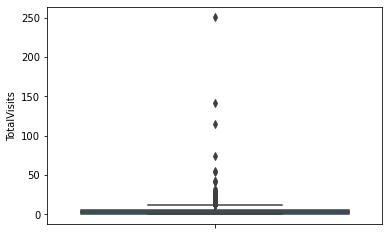

In [216]:
sns.boxplot(y='TotalVisits', data=lead_data)
plt.show()

- `"TotalVisits"` contain outliers as can be seen in the boxplot. We will cap the outliers for analysis.

In [217]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

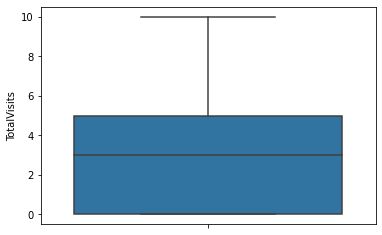

In [218]:
sns.boxplot(y='TotalVisits', data=lead_data)
plt.show()

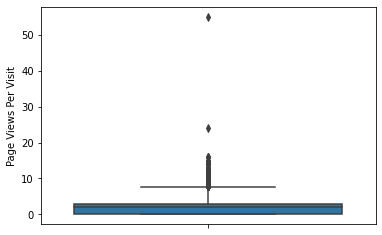

In [219]:
sns.boxplot(y='Page Views Per Visit', data=lead_data)
plt.show()

- `"Page Views Per Visit"` contain outliers as can be seen in the boxplot. We will cap the outliers for analysis.

In [220]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

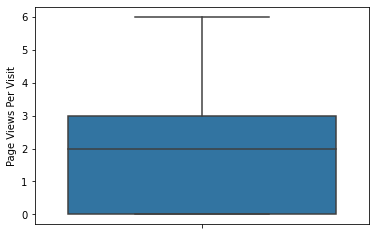

In [221]:
sns.boxplot(y='Page Views Per Visit', data=lead_data)
plt.show()

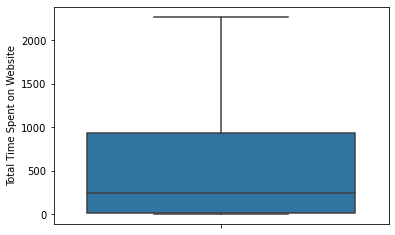

In [222]:
sns.boxplot(y='Total Time Spent on Website', data=lead_data)
plt.show()

In [223]:
# after outlier treatment detailed percentile values
lead_data.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.134740,487.698268,2.225451
std,0.486714,2.787787,548.021466,1.800023
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,10.000000,2272.000000,6.000000


### 3.6 Fixing Invalid values & Standardising Data in columns

- Checking if entries in data are in correct format or not , casing styles (UPPER,lower)
- Checking data types of columns

In [224]:
columnsList = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList:
    perc = 100*lead_data[i].value_counts(normalize=True)
    print("Value counts percentage for : ", i, "\n")
    print(perc, "\n")
    print("----"*20)

Value counts percentage for :  Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

--------------------------------------------------------------------------------
Value counts percentage for :  Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog               

<strong>NOTE:</strong> 

- We've noticed that some categories/levels in the `"Lead Score" and "Last Activity"` columns have very few records. To prevent ending up with a bunch of unnecessary columns when we create dummy variables, we're planning to group these categories together under "Others". That way, we can keep things neat and tidy.

- Also we can see `"Google"` & `"google"` are same in `"Lead Source"`, so we will standardise the case.

#### 3.6.1 Grouping Low frequency values

In [225]:
# Grouping low frequency value levels to Others
lead_data['Lead Source'] = lead_data['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
lead_data['Lead Source'] = lead_data['Lead Source'].replace("google","Google")

In [226]:
# value_counts percentage after replace
lead_data["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [227]:
# Grouping low frequency value levels to Others 
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [228]:
# value_counts percentage after replace
lead_data['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

#### 3.6.2 Mapping Binary categorical variables

In [229]:
# Mapping binary categorical variables (Yes/No to 1/0) 

lead_data['Do Not Email'] = lead_data['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

lead_data['A free copy of Mastering The Interview'] = lead_data['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

In [230]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

<strong>NOTE:</strong> The data types appear to be suitable and no modifications are necessary.

## Step 4: Exploratory Data Analysis

### 4.1 Checking if Data is Imbalanced or not
- Data is imbalance when one value is present in majority and other is in minority meaning an uneven distribution of observations in dataset
- Data imbalance is in the context of Target variable only
- `Target variable` is `'Converted'` which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted 

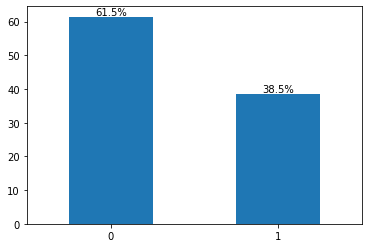

In [231]:
ax = (100*lead_data['Converted'].value_counts(normalize=True)).plot.bar()
plt.xticks(rotation=0)


for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

<strong>Insights:</strong> 
- **Conversion rate is of 38.5%**, meaning only 38.5% of the people have converted to leads.(Minority)
- While 61.5% of the people didnt convert to leads. (Majority)

### 4.2 Univariate Analysis

#### 4.2.1 Univariate Analysis for Categorical Variables

In [232]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

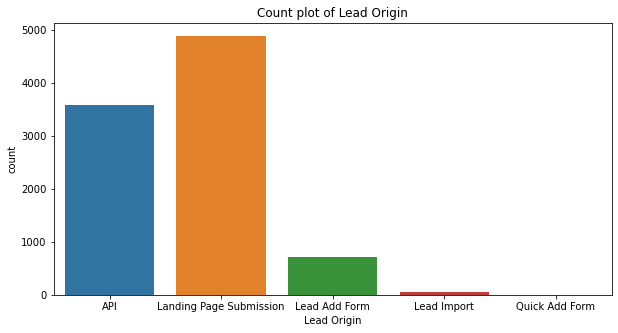

In [233]:
plt.figure(figsize=(10,5))
sns.countplot(lead_data['Lead Origin'])
plt.title("Count plot of Lead Origin")
plt.show()

<strong>Insights:</strong> 
1. **Landing Page Submission**: This is the most significant source of leads, indicating effective landing page design and conversion strategies.
2. **API**: This channel also contributes substantially to lead generation, suggesting robust integration with external platforms or systems.
3. **Lead Add Form**: This method has a moderate number of leads, possibly indicating that while useful, it might need optimization or more promotion.
4. **Lead Import**: This source shows minimal lead generation, indicating it might not be a primary focus or needs better data management strategies.
5. **Quick Add Form**: The negligible number of leads from this source suggests it is underutilized or ineffective.

**Actionable Insights**:
- Continue optimizing landing pages to maintain high lead conversion rates.
- Leverage API integrations to capture more leads from external sources.
- Review the Lead Add Form process for potential improvements.
- Investigate the reasons behind low leads from Lead Import and Quick Add Form, and consider whether these methods need more attention or resources.

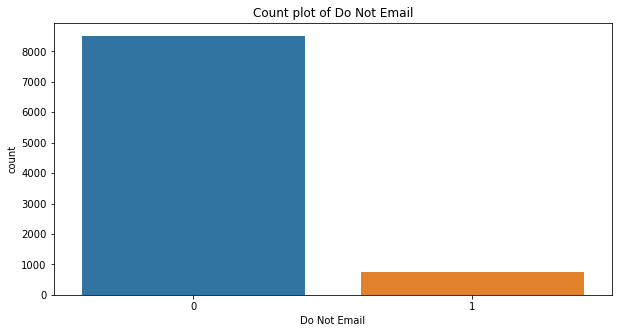

In [234]:
plt.figure(figsize=(10,5))
sns.countplot(lead_data['Do Not Email'])
plt.title("Count plot of Do Not Email")
plt.show()

<strong>Insights:</strong> 
- The chart shows that the majority of leads (indicated by '0') are open to receiving emails, while a smaller fraction (indicated by '1') have opted out or marked as `Do Not Email`. This suggests that email remains a viable communication channel for most leads.

**Actionable Insights**:
- Leverage email marketing strategies to engage with the majority of the leads.
- Investigate the reasons behind the `Do Not Email` requests, and explore alternative communication channels or strategies for these leads to ensure they are still effectively engaged without breaching their preferences.

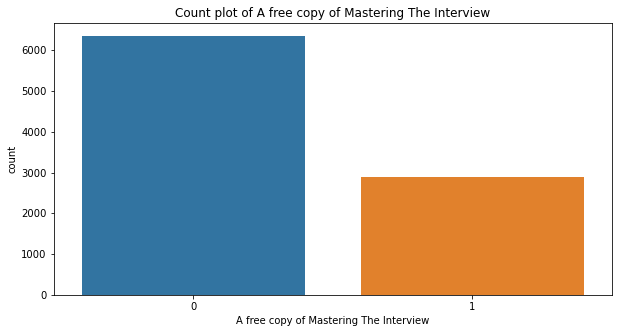

In [235]:
plt.figure(figsize=(10,5))
sns.countplot(lead_data['A free copy of Mastering The Interview'])
plt.title("Count plot of A free copy of Mastering The Interview")
plt.show()

**Insights:**
- Approximately 6500 users did not receive `A free copy of Mastering The Interview`, while approximately 3000 did. This distribution suggests that the **free copy** may have been offered to a random sample of users.

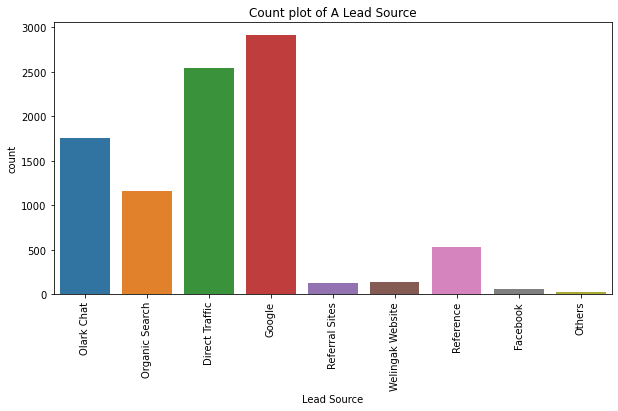

In [236]:
plt.figure(figsize=(10,5))
sns.countplot(lead_data['Lead Source'])
plt.title("Count plot of A Lead Source")
plt.xticks(rotation=90)
plt.show()

**Insights:**
- Google is the most effective lead source, suggesting strong online visibility.
- Direct Traffic indicates high brand recognition or successful offline campaigns.
- Olark Chat shows the value of interactive customer support in lead generation.
- Organic Search highlights the importance of SEO.
- Facebook, Referral Sites and Others have minimal impact, suggesting these channels are underutilized or ineffective.

**Actionable Insights:**

- Continue investing in Google and Direct Traffic.
- Enhance SEO strategies.
- Evaluate and optimize low-performing channels, especially referral sites and social media, to increase lead generation.

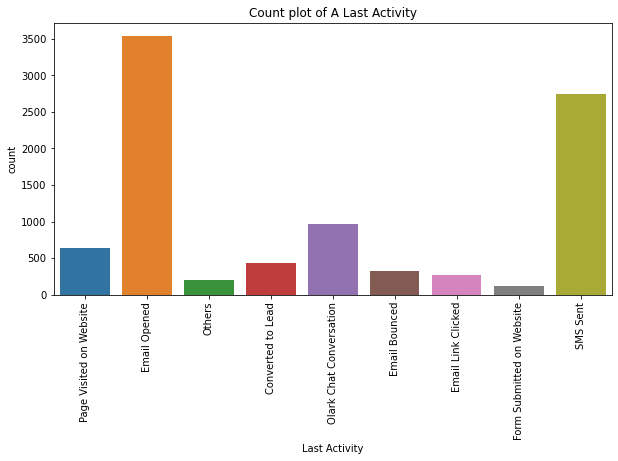

In [237]:
plt.figure(figsize=(10,5))
sns.countplot(lead_data['Last Activity'])
plt.title("Count plot of A Last Activity")
plt.xticks(rotation=90)
plt.show()

**Insights:**
- The bar chart shows `Email Opened` as the dominant last activity, followed by `SMS Sent`, indicating strong engagement through these channels. 
- `Olark Chat Conversation` and `Converted to Lead` have moderate engagement, suggesting some users seek interactive communication or are moving toward conversion. 
- Lower counts in `Page Visited on Website`, `Email Bounced`, `Email Link Clicked` and `Form Submitted on Website` indicate potential areas for improvement. 

**Actionable Insights:**
- To enhance overall engagement, focus on optimizing email and SMS content, investigate low-engagement areas, and consider segmenting the audience for targeted strategies.

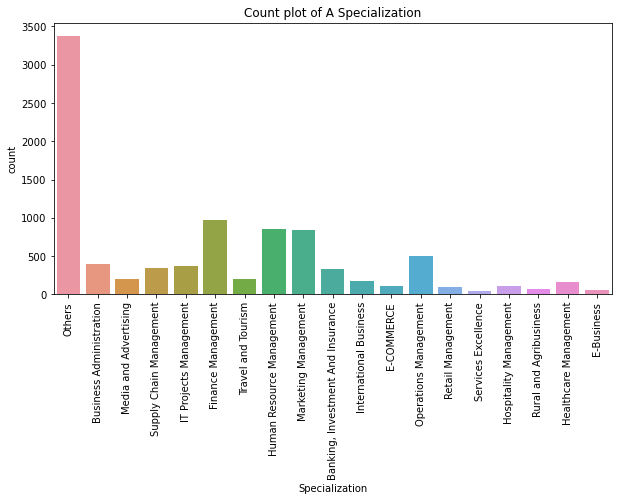

In [238]:
plt.figure(figsize=(10,5))
sns.countplot(lead_data['Specialization'])
plt.title("Count plot of A Specialization")
plt.xticks(rotation=90)
plt.show()

**Insights:**
- The chart shows `Others` as the dominant `specialization`, indicating a diverse range of uncategorized fields. 
- Specific specializations like `Finance Management`, `Human Resource Management`, and `Marketing Management` are most common. 
- `Business Administration`, `IT Projects Management`, and `Operations Management` have moderate representation, while `Healthcare Management`, `E-Business`, and `Rural and Agribusiness` are minimally represented, suggesting these are niche fields. 

**Actionable Insights:**
- The large **Others** category highlights a potential need for more detailed data classification to better understand specialization trends and distributions.

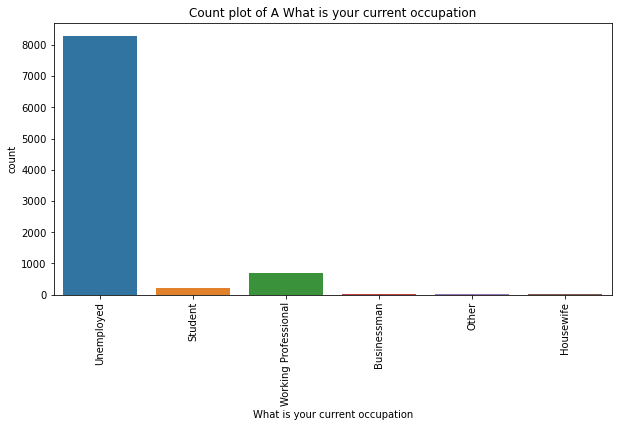

In [239]:
plt.figure(figsize=(10,5))
sns.countplot(lead_data['What is your current occupation'])
plt.title("Count plot of A What is your current occupation")
plt.xticks(rotation=90)
plt.show()

**Insights:**
- The chart shows a predominant number of individuals identifying as `Unemployed` indicating a significant job-seeking population. 
- `Working Professional` and `Student` categories follow, suggesting a smaller segment engaged in employment or education.
- Categories like `Businessman`, `Other` and `Housewife` have minimal representation, indicating these are less common occupations within this dataset.
- This distribution highlights a potential focus area for employment support services and educational programs aimed at transitioning the unemployed into the workforce. 

**Actionable Insights:**
- The data suggests a need for targeted interventions to address the high unemployment rate and support career development.

#### 4.2.2 Univariate Analysis for Numerical Variable

In [240]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

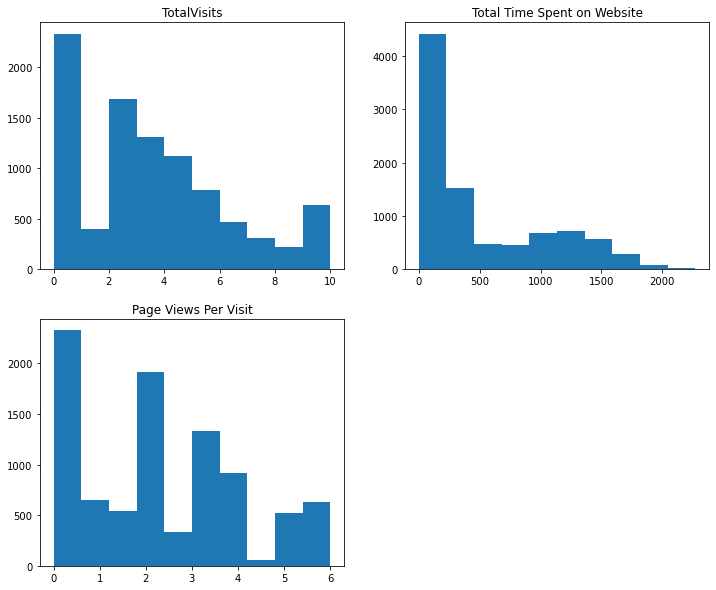

In [241]:
plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.hist(lead_data['TotalVisits'])
plt.title("TotalVisits")

plt.subplot(222)
plt.hist(lead_data['Total Time Spent on Website'])
plt.title("Total Time Spent on Website")

plt.subplot(223)
plt.hist(lead_data['Page Views Per Visit'])
plt.title("Page Views Per Visit")
plt.show()

### 4.3 Bivariate Analysis

#### 4.3.1 Bivariate Analysis for Categorical Variables

In [242]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

TotalVisits, Total Time Spent on Website , Page Views Per Visit

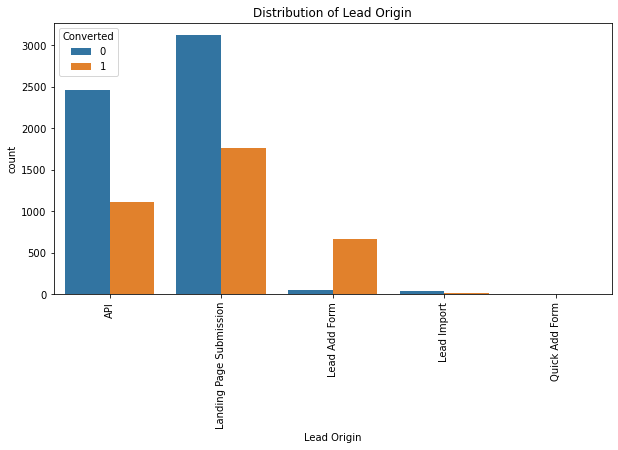

In [243]:
plt.figure(figsize=(10,5))

sns.countplot(x='Lead Origin', hue='Converted', data=lead_data)
plt.title("Distribution of Lead Origin")
plt.xticks(rotation=90)
plt.show()

**Insights:**
- The bar chart shows that `Landing Page Submission` is the most common lead origin, followed by `API`. 
- Both sources have high conversion rates, but `Landing Page Submission` has a slightly higher conversion ratio.

**Actionable Insights:**
- Quick Add Form has low conversion rate. Focus on improving `API` and `Landing Page Submission` performance to maximize lead conversions.

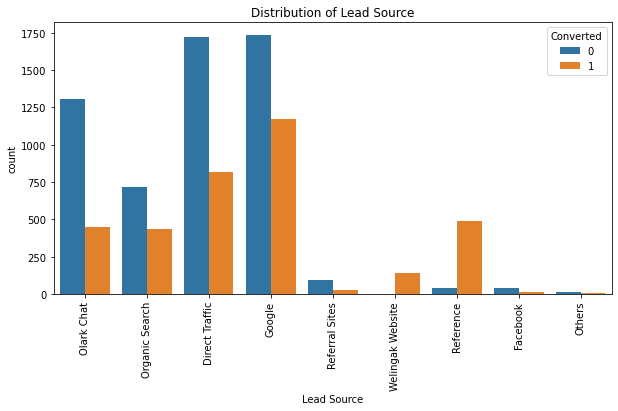

In [244]:
plt.figure(figsize=(10,5))

sns.countplot(x='Lead Source', hue='Converted', data=lead_data)
plt.title("Distribution of Lead Source")
plt.xticks(rotation=90)
plt.show()

**Insights:**
- The bar chart indicates `Google` and `Direct Traffic` as the primary lead sources with high volume but lower conversion rates.
- `Reference` has fewer leads but the highest conversion rate, suggesting high-quality leads. 

**Actionable Insights:**
- Focus on improving `Organic Search`, `Direct Traffic` and `Google` performance to maximize lead conversions.

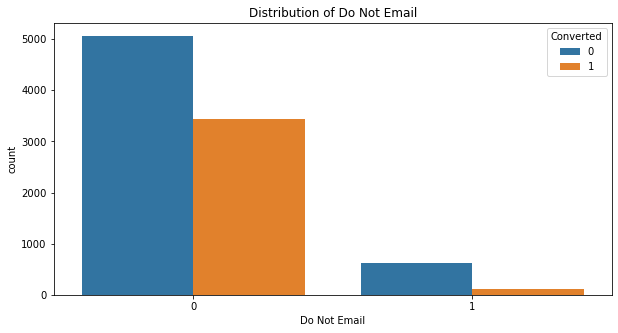

In [245]:
plt.figure(figsize=(10,5))

sns.countplot(x='Do Not Email', hue='Converted', data=lead_data)
plt.title("Distribution of Do Not Email")
plt.show()

**Insights:** 
- The bar chart a significantly higher number of individuals have opted out of emails compared to those who have not.
- The conversion rate seems to be lower among those who have opted out of emails.

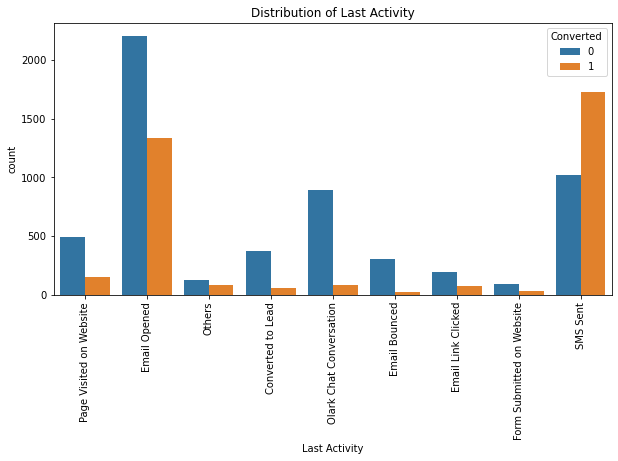

In [246]:
plt.figure(figsize=(10,5))

sns.countplot(x='Last Activity', hue='Converted', data=lead_data)
plt.title("Distribution of Last Activity")
plt.xticks(rotation=90)
plt.show()

**Insights:**
- `Email Opened` and `SMS Sent` are top activities leading to conversions. 
- `Page Visited on Website` also shows promise. 

**Actionable Insights:**
- Focus on increasing the conversion rate for `Page Visited on Website`. 
- Continue to optimize the `Email Opened` and `Others` activities

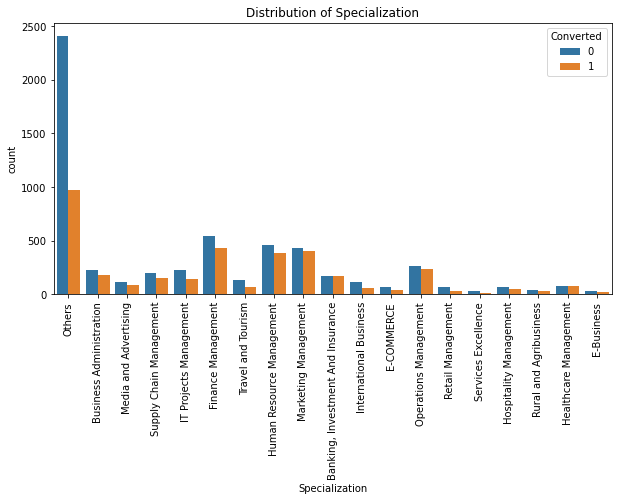

In [247]:
plt.figure(figsize=(10,5))


sns.countplot(x='Specialization', hue='Converted', data=lead_data)
plt.title("Distribution of Specialization")
plt.xticks(rotation=90)
plt.show()

**Insights:**
- `Others` and `Business Administration` are the top specializations with the highest number of both converted and unconverted leads.
- `IT Projects Management`, `Finance Management`, and `Travel and Tourism` show potential for conversion, with a decent number of converted leads.
- `Media and Advertising`, `Supply Chain Management`, `Human Resource Management`, `Marketing Management`, and `Banking Investment and Insurance` have a noticeable number of unconverted leads, which could be an area for improvement.
- **Specializations like `Healthcare Management`, `E-Business` and `Rural and Agribusiness` have very low numbers of leads, both converted and unconverted, indicating a potential lack of focus or outreach in these areas.


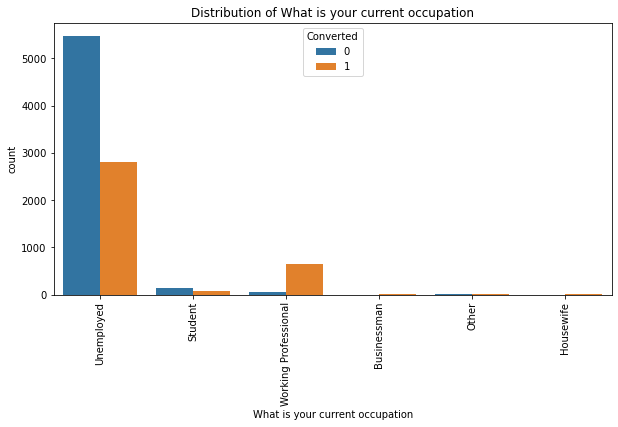

In [248]:
plt.figure(figsize=(10,5))

sns.countplot(x='What is your current occupation', hue='Converted', data=lead_data)
plt.title("Distribution of What is your current occupation")
plt.xticks(rotation=90)
plt.show()

**Insights:**
- `Unemployed` shows the highest conversion rate, followed by `Working Professional`.
- `Student` and `Businessman` have lower conversion rates. 

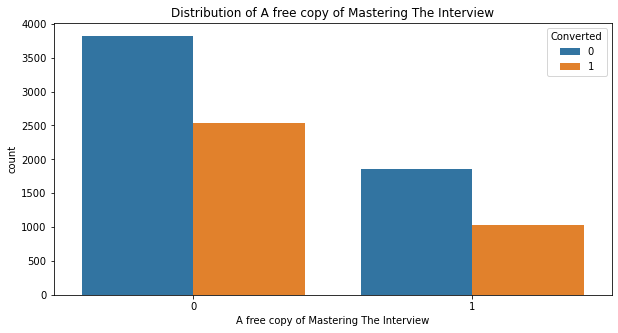

In [249]:
plt.figure(figsize=(10,5))

sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=lead_data)
plt.title("Distribution of A free copy of Mastering The Interview")
plt.show()

**Insights:**
- `A free copy of Mastering The Interview` appears to have no significant impact on conversion rates. Both groups with and without the free copy have similar conversion rates. Further analysis is needed to explore the impact of other factors on conversions.

### 4.3.2 Bivariate Analysis for Numerical Variables

<Figure size 1152x288 with 0 Axes>

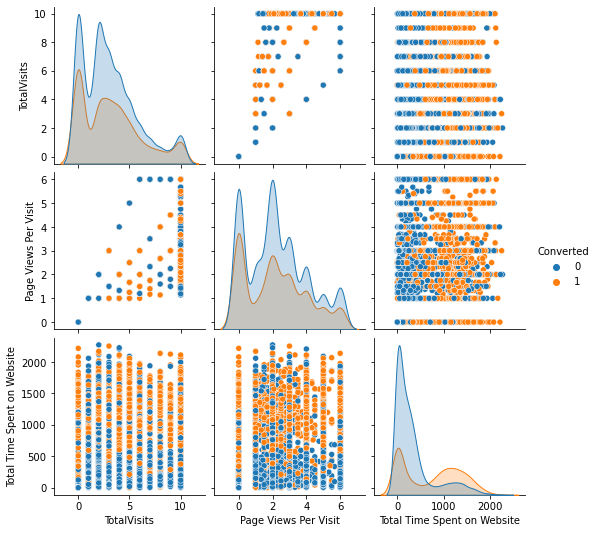

In [250]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=lead_data,vars=["TotalVisits","Page Views Per Visit","Total Time Spent on Website"],hue="Converted")                                  
plt.show()

In [251]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

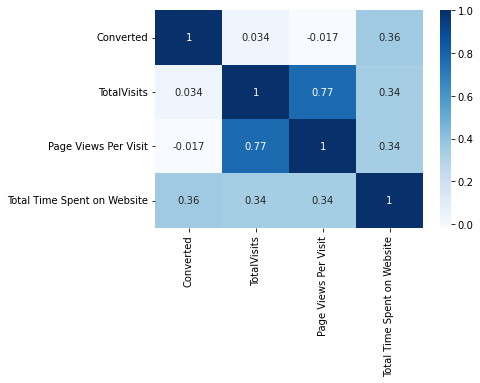

In [252]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=lead_data[num_cols].corr(), cmap="Blues", annot=True)
plt.show()

## Step 5: Data Preparation

### 5.1 Dummy Variables

In [253]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [254]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

In [255]:
lead_data.shape

(9240, 11)

In [256]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(lead_data[["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"]], drop_first=True)

# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy], axis=1)

In [257]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0


In [258]:
lead_data.shape

(9240, 54)

In [259]:
# We have created dummies for the below variables, so we can drop them
lead_data = lead_data.drop(["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"], axis=1)

In [260]:
lead_data.shape

(9240, 49)

In [261]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 8   Lead Origin_Lead Import                               9240

## Step 6: Test-Train Split 

In [262]:
# Putting predictor variables to X
X = lead_data.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [263]:
# Putting Target variables to y
y = lead_data["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [264]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [265]:
print("X_train:", X_train.shape, "\ny_train", y_train.shape)

X_train: (6468, 48) 
y_train (6468,)


In [266]:
print("X_tets", X_test.shape, "\ny_test", y_test.shape)

X_tets (2772, 48) 
y_test (2772,)


## Step 7: Feature Scaling 

In [267]:
# using standard scaler for scaling the features
scaler = StandardScaler()

X_train[['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview']] = scaler.fit_transform(X_train[['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview']])

In [268]:
# check X-train dataframe after standard scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,-0.291638,-1.121955,-0.885371,-1.234699,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,-0.291638,0.313260,0.005716,-0.493295,1.485511,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,-0.291638,0.672063,-0.691418,0.158918,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,-0.291638,0.672063,1.365219,1.552535,-0.673169,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3934,-0.291638,-1.121955,-0.885371,-1.234699,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [269]:
# Check the Lead Conversion Rate
LCR = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
LCR

38.53896103896104

**Note:** We have 38.5% Conversion Rate

## Step 8: Looking at Correlations

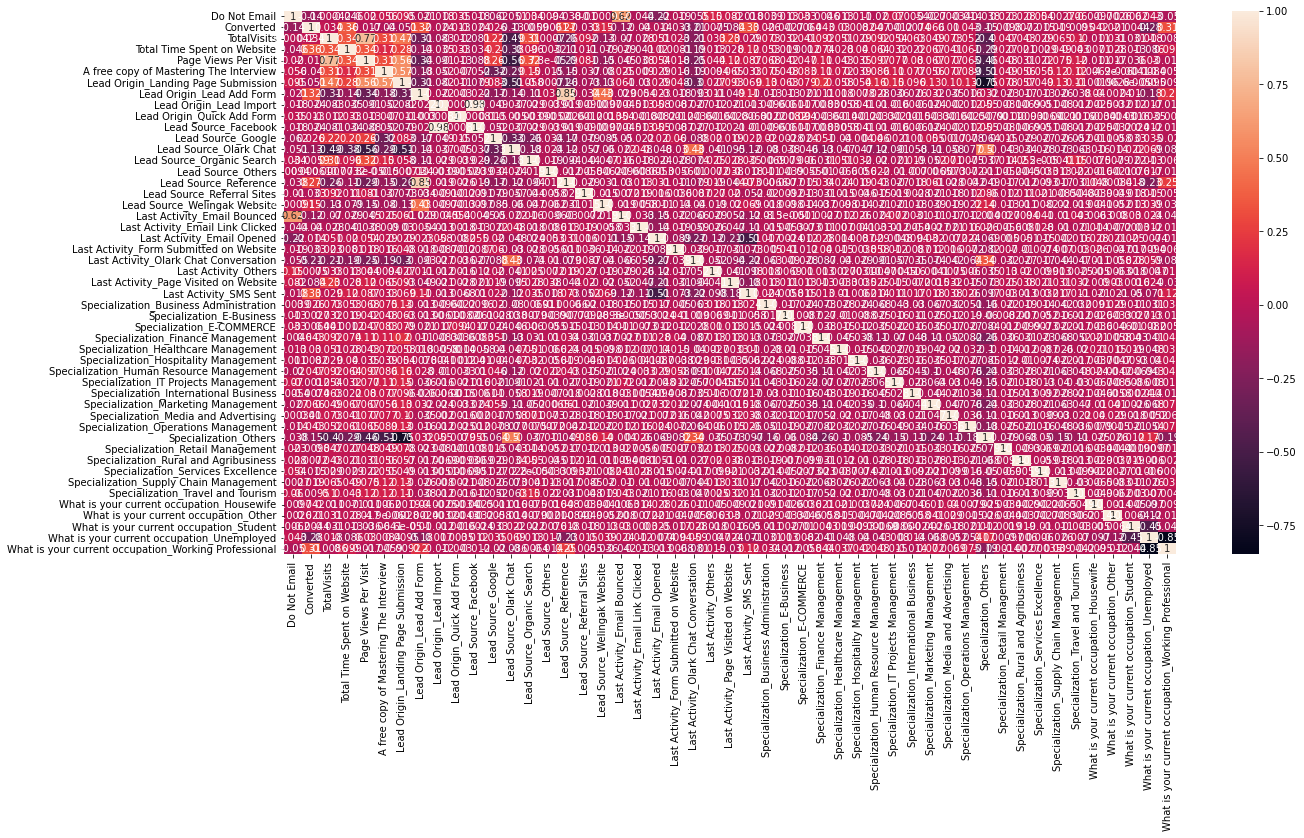

In [270]:
# Let's see the correlation matrix 
plt.figure(figsize=(20,10))
sns.heatmap(lead_data.corr(), annot=True)
plt.show()

**NOTE:**
- As the above **heatmap** has so many columns lets breakdown suspected variables which might have high correlation with each other analysing variables which might be highly correlated with each other from same class from above graph

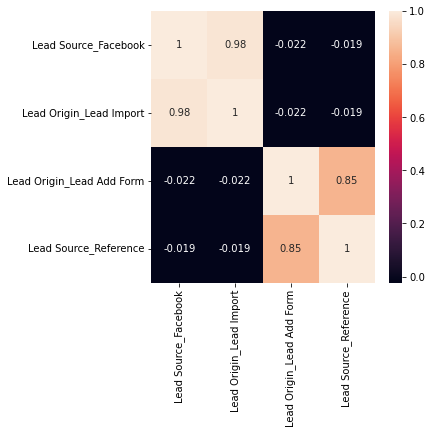

In [271]:
plt.figure(figsize=(5,5))
sns.heatmap(lead_data[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(), annot=True)
plt.show()

<strong>Note:</strong> These predictor variables above are very highly correlated with each other near diagonal with (0.98 and 0.85), it is better that we drop one of these variables from each pair as they won’t add much value to the model. So , we can drop any of them, lets drop `'Lead Origin_Lead Import'` and `'Lead Origin_Lead Add Form'`.

In [272]:
# Dropping highly correlated dummy variables
X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'], axis=1)
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'], axis=1)

## Step 9: Feature Selection Using RFE (Recursive Feature Elimination)

In [273]:
# Lets use RFE to reduce variables
logreg = LogisticRegression()

In [274]:
rfe = RFE(logreg, 15)   # running RFE with 13 variables as output

In [275]:
rfe = rfe.fit(X_train, y_train)

In [276]:
rfe.support_

array([False, False,  True, False, False,  True, False,  True, False,
        True, False,  True,  True, False,  True, False, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True])

In [277]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('A free copy of Mastering The Interview', False, 14),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 18),
 ('Last Activity_Email Link Clicked', False, 5),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Busin

In [278]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [279]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Special

## Step 10: Model Building

### Model-1

In [280]:
# Building model using statsmodels, for the detailed statistics
X_train_sm = sm.add_constant(X_train[rfe_col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Sun, 04 Aug 2024   Deviance:                       5465.5
Time:                        20:57:44   Pearson chi2:                 8.09e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<strong>NOTE :</strong> `"What is your current occupation_Housewife"` column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.

### Model-2

In [281]:
# Dropping column
rfe_col = rfe_col.drop("What is your current occupation_Housewife")

In [282]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Sun, 04 Aug 2024   Deviance:                       5480.7
Time:                        20:57:45   Pearson chi2:                 8.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<strong>NOTE:</strong> `"Lead Source_Facebook"` column will be removed from model due to high p-value of 0.187, which is above the accepted threshold of 0.05 for statistical significance.

### Model-3

In [283]:
# Dropping column
rfe_col = rfe_col.drop("Lead Source_Facebook")

In [284]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Sun, 04 Aug 2024   Deviance:                       5482.6
Time:                        20:57:45   Pearson chi2:                 8.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<strong>NOTE:</strong> `"Lead Source_Others"` column will be removed from model due to high p-value of 0.055, which is above the accepted threshold of 0.05 for statistical significance.

### Model-4

In [285]:
# Dropping column
rfe_col = rfe_col.drop("Lead Source_Others")

In [286]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train[rfe_col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Sun, 04 Aug 2024   Deviance:                       5486.1
Time:                        20:57:45   Pearson chi2:                 8.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<strong>NOTE:</strong>  
- **Model 4** is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis.

- Now lets check VIFs for these variables to check if there is any multicollinearity which exists among the independent variables

In [287]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.47
1,Lead Origin_Landing Page Submission,2.45
5,Last Activity_Email Opened,2.36
8,Last Activity_SMS Sent,2.20
2,Lead Source_Olark Chat,2.14
6,Last Activity_Olark Chat Conversation,1.72
3,Lead Source_Reference,1.31
0,Total Time Spent on Website,1.24
11,What is your current occupation_Working Profes...,1.21
4,Lead Source_Welingak Website,1.08


<strong>NOTE:</strong> 
- p-values for all variables is less than 0.05
- This model looks acceptable as everything is under control (p-values & VIFs).
- So we will final our Model 4 for `Model Evaluation`.

## Step 11: Model Evaluation

In [288]:
# Getting the predicted values on the train set
y_train_pred = logm4.predict(X_train_sm)
y_train_pred[:10]

1871    0.474082
6795    0.073252
3516    0.249087
8105    0.768973
3934    0.212973
4844    0.987807
3297    0.108454
8071    0.996128
987     0.169259
7423    0.869641
dtype: float64

In [289]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [290]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.474082,1871
1,0,0.073252,6795
2,0,0.249087,3516
3,0,0.768973,8105
4,0,0.212973,3934


<strong>NOTE:</strong> 
- Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [291]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.474082,1871,0
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


### 11.1 Confusion matrix

In [292]:
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["predicted"])
print(confusion)

[[3588  414]
 [ 846 1620]]


In [293]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3588       |   414
# converted           846        |   1620  


# Above is the confusion matrix when we use threshold of probability as 0.5

### 11.2 Accuracy Score

In [294]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["predicted"]))

0.8051948051948052


### 11.3 Metrics beyond simply accuracy
- Sensitivity and Specificity
- When we have Predicted at threshold 0.5 probability

In [295]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [296]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.656934306569343


In [297]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.896551724137931


In [298]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10344827586206896


In [299]:
# positive predictive value 
print (TP / float(TP+FP))

0.7964601769911505


In [300]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8092016238159675


## Step 12: Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [301]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [302]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

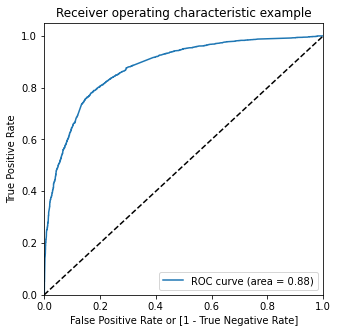

In [303]:
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

## Step 13: Finding Optimal Cutoff Point
- Optimal cutoff probability is that prob where we get `balanced sensitivity and specificity`

In [304]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.474082,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.073252,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.249087,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.768973,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.212973,3934,0,1,1,1,0,0,0,0,0,0,0


In [305]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.595702  0.973642  0.362819
0.2   0.2  0.721243  0.920114  0.598701
0.3   0.3  0.791280  0.832928  0.765617
0.4   0.4  0.813698  0.763585  0.844578
0.5   0.5  0.805195  0.656934  0.896552
0.6   0.6  0.792981  0.585969  0.920540
0.7   0.7  0.779066  0.507705  0.946277
0.8   0.8  0.754020  0.405515  0.968766
0.9   0.9  0.707792  0.247364  0.991504


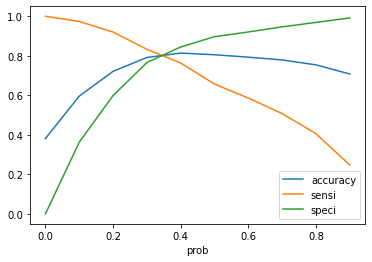

In [306]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the curve above graph, 0.345 is the approx point where all the curves meet, so 0.345 seems to be our `Optimal cutoff point` for probability threshold .

In [307]:
y_train_pred_final['final_predicted'] = y_train_pred_final["Converted_Prob"].map( lambda x: 1 if x > 0.345 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.474082,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.073252,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.249087,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.768973,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.212973,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [308]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

0.8045763760049475


In [309]:
confusion2 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])
print(confusion2)

[[3230  772]
 [ 492 1974]]


In [310]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [311]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8004866180048662


In [312]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8070964517741129


In [313]:
# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate :",FP/ float(TN+FP))

False Postive Rate : 0.19290354822588707


In [314]:
# Positive predictive value 
print ("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7188638018936635


In [315]:
# Negative predictive value
print ("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8678130037614186


### 13.1 Precision and Recall

In [316]:
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["predicted"])
confusion

array([[3588,  414],
       [ 846, 1620]], dtype=int64)

##### Precision
TP / TP + FP

In [317]:
print("Precision :", precision_score(y_train_pred_final["Converted"], y_train_pred_final["predicted"]))

Precision : 0.7964601769911505


##### Recall
TP / TP + FN

In [318]:
print("Recall :", recall_score(y_train_pred_final["Converted"], y_train_pred_final["predicted"]))

Recall : 0.656934306569343


### 13.2 Precision and recall tradeoff

In [319]:
# Creating precision-recall tradeoff curve
y_train_pred_final["Converted"], y_train_pred_final["predicted"]
p, r, thresholds = precision_recall_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

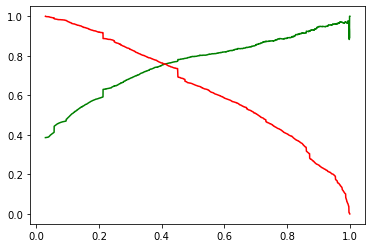

In [320]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.show()

**NOTE:** The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve.

In [321]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [322]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,precision_recall_prediction
0,0,0.474082,1871,0,1,1,1,1,1,0,0,0,0,0,1,1
1,0,0.073252,6795,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.249087,3516,0,1,1,1,0,0,0,0,0,0,0,0,0
3,0,0.768973,8105,1,1,1,1,1,1,1,1,1,0,0,1,1
4,0,0.212973,3934,0,1,1,1,0,0,0,0,0,0,0,0,0


In [323]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_precision_recall["Converted"], y_train_precision_recall["precision_recall_prediction"]))

0.8157081014223871


In [324]:
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
confusion_matrix

array([[3406,  596],
       [ 596, 1870]], dtype=int64)

In [325]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [326]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7583130575831306


In [327]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8510744627686156


In [328]:
print("Precision :", precision_score(y_train_precision_recall["Converted"], y_train_precision_recall["precision_recall_prediction"]))

Precision : 0.7583130575831306


In [329]:
print("Recall :", recall_score(y_train_precision_recall["Converted"], y_train_precision_recall["precision_recall_prediction"]))

Recall : 0.7583130575831306


## Step 14: Making predictions on the test set

In [330]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2772 non-null   int64  
 1   TotalVisits                                           2772 non-null   float64
 2   Total Time Spent on Website                           2772 non-null   int64  
 3   Page Views Per Visit                                  2772 non-null   float64
 4   A free copy of Mastering The Interview                2772 non-null   int64  
 5   Lead Origin_Landing Page Submission                   2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                            2772 non-null   uint8  
 7   Lead Source_Facebook                                  2772 non-null   uint8  
 8   Lead Source_Google                                    2

In [331]:
X_test[['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview']] = scaler.transform(X_test[['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview']])

In [332]:
X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,What is your current occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,0,1,0,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,0,1
9199,-0.885371,0,1,0,0,0,1,0,0,0,1,0
4359,-0.885371,0,0,1,0,1,0,0,0,0,0,0


In [333]:
# Adding constant value
X_test_sm = sm.add_constant(X_test)

In [334]:
X_test_sm.shape

(2772, 13)

In [335]:
# making prediction using model 4 (final model)
y_test_pred = logm4.predict(X_test_sm)

# Let's find it out top 10 columns
y_test_pred[:10]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [336]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [337]:
# Let's see the head
y_pred_1.head()

,0
4269,0.697934
2376,0.860665
7766,0.889241
9199,0.057065
4359,0.871510


In [338]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Let's see the head
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [339]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [340]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [341]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Let's check the head
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.697934
1,1,2376,0.860665
2,1,7766,0.889241
3,0,9199,0.057065
4,1,4359,0.871510


In [342]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [343]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.697934
1,2376,1,0.860665
2,7766,1,0.889241
3,9199,0,0.057065
4,4359,1,0.871510


In [344]:
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.697934,1
1,2376,1,0.860665,1
2,7766,1,0.889241,1
3,9199,0,0.057065,0
4,4359,1,0.871510,1


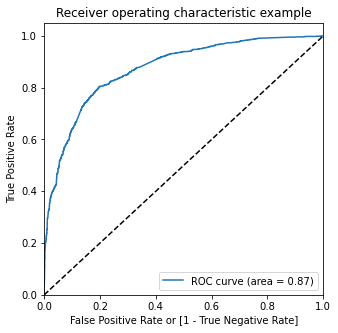

In [345]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

<strong>NOTE:</strong> Area under ROC curve is 0.87 out of 1 which indicates a good predictive model

In [346]:
# Let's check the overall accuracy.
print("Accuracy :", metrics.accuracy_score(y_pred_final["Converted"], y_pred_final["final_predicted"]))

Accuracy : 0.8033910533910534


In [347]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final["Converted"], y_pred_final["final_predicted"])
confusion2

array([[1353,  324],
       [ 221,  874]], dtype=int64)

In [348]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [349]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7981735159817351


In [350]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8067978533094812


- `For Test set`
    - Accuracy : 80.34%
    - Sensitivity : 79.82% ≈ 80%
    - Specificity : 80.68%
    
These matrics are very close to train set, so out final model logm4 is  performing with good consistency on both Train & Test set

### Adding `Lead Score` Feature to Test dataframe
- A higher score would mean that the lead is hot, i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [351]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.697934,1,70
1,2376,1,0.860665,1,86
2,7766,1,0.889241,1,89
3,9199,0,0.057065,0,6
4,4359,1,0.871510,1,87


<strong>Lead Score:</strong> Lead Score is assigned to the customers
- The customers with a higher lead score have a higher conversion chance 
- The customers with a lower lead score have a lower conversion chance.

# <strong>Conclusion: </strong> 

##  Train - Test
### <strong>Train Data Set:</strong>            

- <strong>Accuracy:</strong> 80.46%

- <strong>Sensitivity:</strong> 80.05%

- <strong>Specificity:</strong> 80.71%

### <strong>Test Data Set:</strong> 

- <strong>Accuracy:</strong> 80.34%

- <strong>Sensitivity:</strong> 79.82% ≈ 80%

- <strong>Specificity:</strong> 80.68%
 

<strong>NOTE:</strong> The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

- The model achieved a `sensitivity of 80.05%` in the train set and 79.82% in the test set, using a cut-off value of 0.345.
- Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
- `The CEO of X Education had set a target sensitivity of around 80%.`
- The model also achieved an accuracy of 80.46%, which is in line with the study's objectives.

- The customers which should be contacted are the customers whose `"Lead Score"` is equal to or greater than 85. They can be termed as  `"Hot Leads"`.


In [352]:
# Let's find it
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
1,2376,1,0.860665,1,86
2,7766,1,0.889241,1,89
4,4359,1,0.871510,1,87
13,2907,1,0.876253,1,88
15,493,1,0.871510,1,87


**NOTE:** So there are 368 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [353]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([2376, 7766, 4359, 2907,  493, 5440, 8429, 1200, 7909, 5638, 6666,
       5448, 1287, 8103, 3444, 2392, 5363, 7476, 8499, 4830, 3192, 2451,
       1365, 6687, 5793, 6066, 8099, 4868, 8120, 2844, 7396,   88, 7683,
       8024, 6860, 4058, 2243,  269, 5666, 2115, 8113, 4645, 2481, 7978,
       3518, 1965, 3845, 2946, 4869,  954, 4902, 5818, 2804, 7157,  446,
       2629, 3725, 4786, 1026, 5825, 8055, 2266, 4403, 2926, 2524, 1467,
       5697, 6725, 6156, 2055, 2549, 2653, 3478, 5687, 5832, 3190,   77,
       4982, 9026, 6243, 4038, 7187, 5812,  841, 7033, 3188, 8556, 5266,
       7818,   12, 1675, 3321, 1973, 7053, 4212, 1350, 8576, 6632, 7877,
       7334, 6375, 1950, 7222, 5586, 7482, 6383, 1425, 8904,  650, 3172,
       2158, 3919, 5784, 3455, 5942, 6046,  472,  833, 4612, 9087, 3456,
       2688, 2914, 5263, 4613, 1928, 8098, 2662, 4281, 6127, 6010, 7636,
        507, 2631, 7448, 2285, 2578, 8920, 8412, 3339, 8054, 8082, 3113,
       4607, 1882, 8087, 3488, 5575, 8888, 2764, 67

In [354]:
# Finding out the Important Features from our final model
parameters=logm4.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website                            5.388662
Lead Source_Reference                                   2.925326
What is your current occupation_Working Professional    2.669665
Last Activity_SMS Sent                                  2.051879
Last Activity_Others                                    1.253061
Total Time Spent on Website                             1.049789
Last Activity_Email Opened                              0.942099
Lead Source_Olark Chat                                  0.907184
Last Activity_Olark Chat Conversation                  -0.555605
const                                                  -1.023594
Specialization_Hospitality Management                  -1.094445
Specialization_Others                                  -1.203333
Lead Origin_Landing Page Submission                    -1.258954
dtype: float64

# <strong>Recommendations: </strong> 

### <strong>To increase our Lead Conversion Rates:</strong>  

- Focus on features with positive coefficients for targeted marketing strategies.
- Develop strategies to attract high-quality leads from top-performing lead sources.
- Engage working professionals with tailored messaging.
- Optimize communication channels based on lead engagement impact.
- More budget/spend can be done on `"Welingak Website"` in terms of advertising, etc.
- Incentives/discounts for providing reference that convert to lead, encourage providing more references.
- Working professionals to be aggressively targeted as they have high conversion rate and will have better financial situation to pay higher fees too. 


### <strong>To identify areas of improvement: </strong>  

- Analyze negative coefficients in specialization offerings.
- Review landing page submission process for areas of improvement.